In [1]:
from rbf import RBF
from rbf import LearningMode
from rbf import CentersSampling
from dataset import SinusData
from dataset import SquareData
import matplotlib.pyplot as plt
from plot_utils import plot_estimate
from plot_utils import plot_error_delta
from plot_utils import error_estimate_delta
from plot_utils import error_estimate_batch
from plot_utils import plot_RBF_grid_search
import numpy as np
import time
import matplotlib.pyplot as plt
from lab1_algorithms.generalised_delta import TwoLP

data = SquareData(noise=True)
data = SinusData(noise=True)

Compare the efect of the number of RBF units and their width for the
two learning approaches. Which error estimate should you choose as the
criterion for these comparative analyses?

## Num of nodes

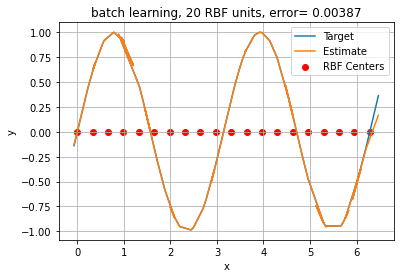

100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


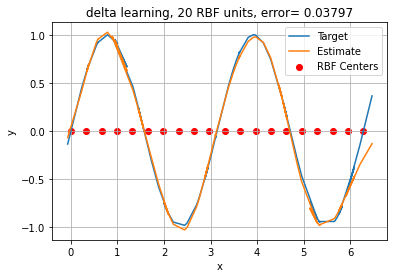

In [4]:
plot_estimate(data, n_nodes=20)
plot_estimate(data, learning_type='delta', delta_max_iters=20, n_nodes=20, delta_lr=0.1)

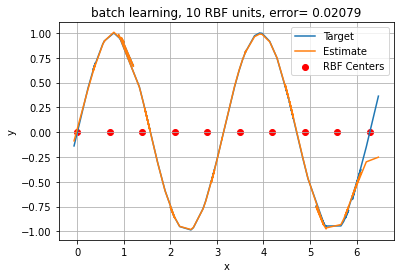

100%|██████████| 20/20 [00:09<00:00,  2.15it/s]


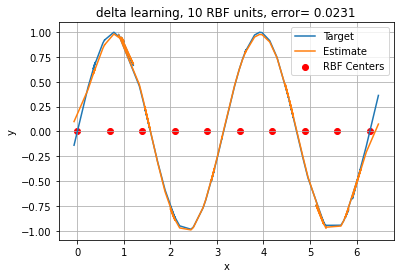

In [8]:
plot_estimate(data, n_nodes=10)
plot_estimate(data, learning_type='delta', delta_max_iters=20, n_nodes=10, delta_lr=0.1)

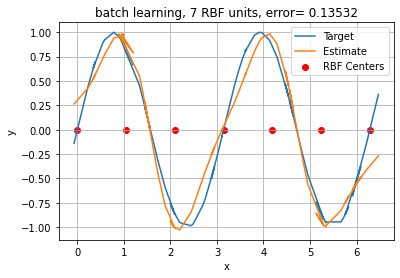

100%|██████████| 20/20 [00:06<00:00,  3.04it/s]


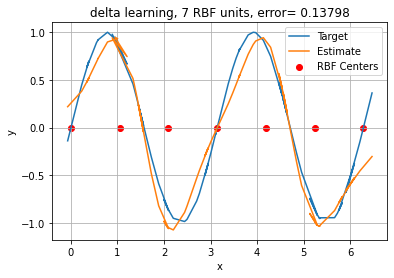

In [10]:
plot_estimate(data, n_nodes=7)
plot_estimate(data, learning_type='delta', delta_max_iters=20, n_nodes=7, delta_lr=0.1)

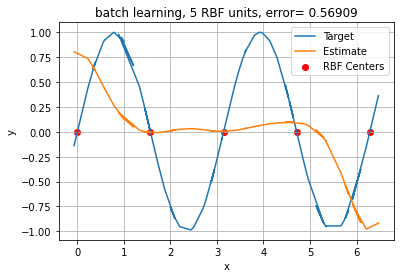

100%|██████████| 20/20 [00:04<00:00,  4.06it/s]


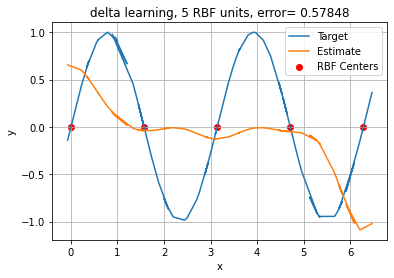

In [11]:
plot_estimate(data, n_nodes=5)
plot_estimate(data, learning_type='delta', delta_max_iters=20, n_nodes=5, delta_lr=0.1)

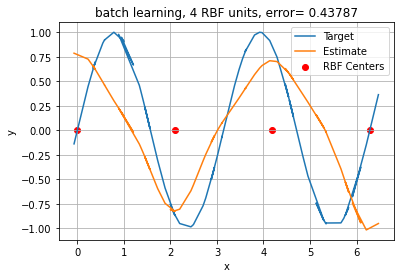

100%|██████████| 40/40 [00:08<00:00,  4.97it/s]


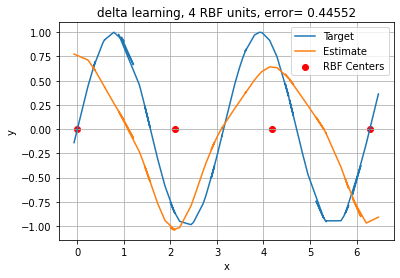

In [14]:
plot_estimate(data, n_nodes=4)
plot_estimate(data, learning_type='delta', delta_max_iters=40, n_nodes=4, delta_lr=0.1)

## Width

In [4]:
data = SquareData(noise=True)
# data = SinusData(noise=True)

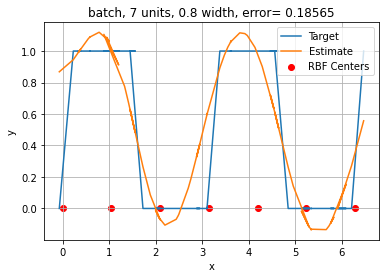

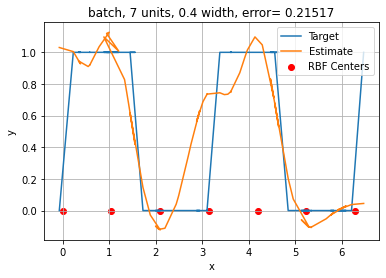

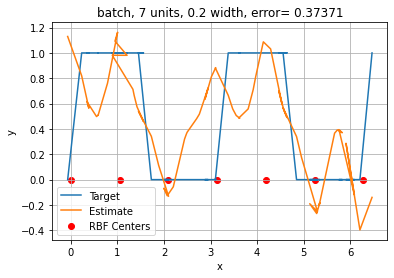

In [5]:
plot_estimate(data, n_nodes=7, sigma=0.8)
plot_estimate(data, n_nodes=7, sigma=0.4)
plot_estimate(data, n_nodes=7, sigma=0.2)

100%|██████████| 20/20 [00:06<00:00,  3.00it/s]


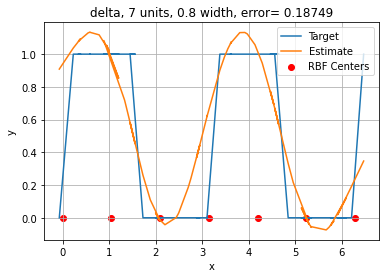

100%|██████████| 20/20 [00:06<00:00,  2.86it/s]


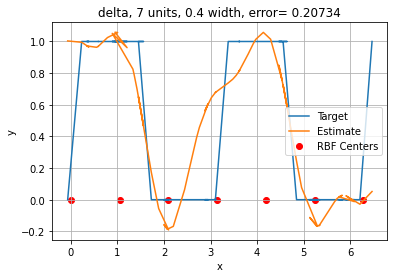

100%|██████████| 20/20 [00:08<00:00,  2.41it/s]


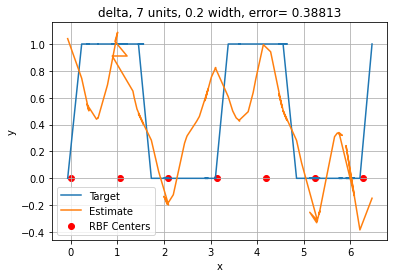

In [6]:
# plot_estimate(data, learning_type='delta', n_nodes=7, sigma=1, delta_max_iters=20)
plot_estimate(data, learning_type='delta', n_nodes=7, sigma=0.8, delta_max_iters=20)
# plot_estimate(data, learning_type='delta', n_nodes=7, sigma=0.6, delta_max_iters=200)
plot_estimate(data, learning_type='delta', n_nodes=7, sigma=0.4, delta_max_iters=20)
plot_estimate(data, learning_type='delta', n_nodes=7, sigma=0.2, delta_max_iters=20)

What can you say about the rate of convergence and its dependence on
the learning rate, eta, for the two learning schemes?

## Learning rate & convergence

100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

Error on the test set: 0.4258733597378465


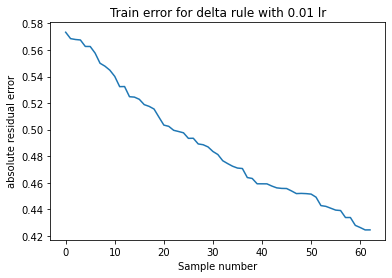

100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Error on the test set: 0.10907747121135106


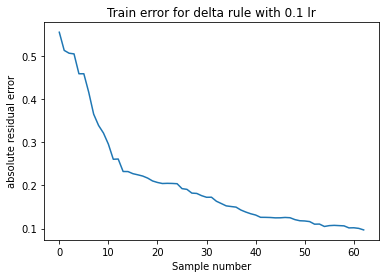

100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

Error on the test set: 0.07048936622410946


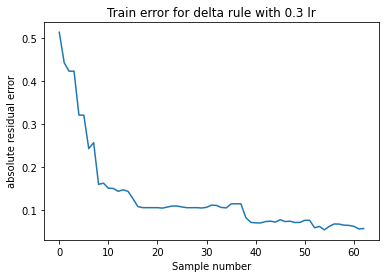

100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

Error on the test set: 1.2962452745150086


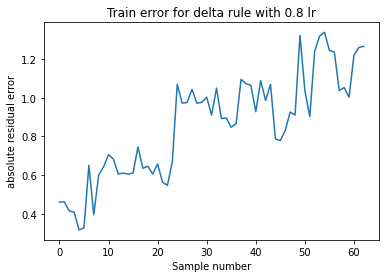

In [3]:
plot_error_delta(data, lr=0.01, max_iters=1, n_nodes=20)
plot_error_delta(data, lr=0.1, max_iters=1, n_nodes=20)
plot_error_delta(data, lr=0.3, max_iters=1, n_nodes=20)
plot_error_delta(data, lr=0.8, max_iters=1, n_nodes=20)

How important is the positioning of the RBF nodes in the input space?
What strategy did you choose? Is it better than random positioning of the
RBF nodes? Please support your conclusions with quantitative evidence
(e.g., error comparison).

## Node positioning

### RANDOM

In [13]:
errors = []
for seed in range(20):
    rbf = RBF(CentersSampling.RANDOM, seed=seed, n_nodes=8)
    y_hat, error = rbf.delta_learning(data.x, data.y, data.x_test, data.y_test, max_iters=100, seed=seed)
    errors.append(error)
    
print(f'Mean of error: {np.mean(errors)}, Variance: {np.var(errors)}')

100%|██████████| 100/100 [00:00<00:00, 145.98it/s]

Mean of error: 0.272349465163192, Variance: 0.00802953211719325


### LINEAR

In [14]:
errors = []
for seed in range(20):
    rbf = RBF(CentersSampling.LINEAR, seed=seed,n_nodes=8)
    y_hat, error = rbf.delta_learning(data.x, data.y, data.x_test, data.y_test, max_iters=100, seed=seed)
    errors.append(error)
    
print(f'Mean of error: {np.mean(errors)}, Variance: {np.var(errors)}')

100%|██████████| 100/100 [00:00<00:00, 140.47it/s]

Mean of error: 0.061166764906099194, Variance: 2.6299408076413183e-05


### WEIGHTED

In [12]:
errors = []
for seed in range(20):
    rbf = RBF(CentersSampling.WEIGHTED, seed=seed, n_nodes=7)
    y_hat, error = rbf.delta_learning(data.x, data.y, data.x_test, data.y_test, max_iters=100, seed=seed)
    errors.append(error)
    
print(f'Mean of error: {np.mean(errors)}, Variance: {np.var(errors)}')

100%|██████████| 100/100 [00:00<00:00, 137.18it/s]

Mean of error: 0.04701356129543926, Variance: 0.00015628076627971545


100%|██████████| 100/100 [00:00<00:00, 141.42it/s]


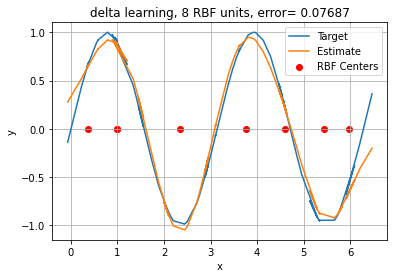

100%|██████████| 100/100 [00:00<00:00, 101.65it/s]


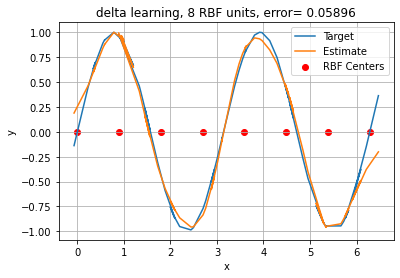

100%|██████████| 100/100 [00:00<00:00, 126.62it/s]


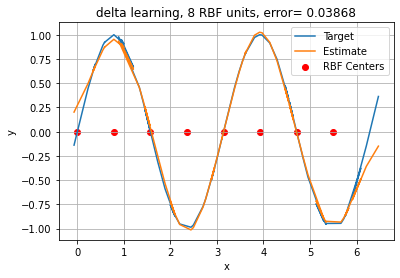

In [15]:
plot_estimate(data, centers_sampling=CentersSampling.RANDOM, learning_type='delta', n_nodes=8)
plot_estimate(data, centers_sampling=CentersSampling.LINEAR, learning_type='delta', n_nodes=8)
plot_estimate(data, centers_sampling=CentersSampling.WEIGHTED, learning_type='delta', n_nodes=7)

Also, for the same network models estimate their test performance on the
original clean data used in section 3.1 (a corresponding test subset but
without noise) and compare your 
ndings.

## Noise vs without noise results

In [3]:
data = SinusData(noise=False)
error_estimate_delta(data, n_nodes=20, sigma=0.5)
error_estimate_batch(data, n_nodes=20, sigma=0.5)

data = SinusData(noise=True)
error_estimate_delta(data, n_nodes=20, sigma=0.5)
error_estimate_batch(data, n_nodes=20, sigma=0.5)



  6%|▌         | 6/100 [00:00<00:01, 54.68it/s]

Error for delta rule avg: 0.014903261000788978, variance: 2.0441125912202712e-05
Error for batch learning: 0.000751938124208283


100%|██████████| 100/100 [00:01<00:00, 59.64it/s]


Error for delta rule avg: 0.023178195454045293, variance: 4.211833824008632e-05
Error for batch learning: 0.0038723926193305336


In [4]:
data = SquareData(noise=False)
error_estimate_delta(data, n_nodes=20, sigma=0.5)
error_estimate_batch(data, n_nodes=20, sigma=0.5)

data = SquareData(noise=True)
error_estimate_delta(data, n_nodes=20, sigma=0.5)
error_estimate_batch(data, n_nodes=20, sigma=0.5)

  7%|▋         | 7/100 [00:00<00:01, 63.46it/s]

Error for delta rule avg: 0.12467879775816951, variance: 4.366429549115928e-05
Error for batch learning: 0.09004469538897737


100%|██████████| 100/100 [00:01<00:00, 60.54it/s]


Error for delta rule avg: 0.17451914747072325, variance: 5.738721908358432e-05
Error for batch learning: 0.16859643639499658


Please compare your optimal RBF network trained in batch mode with
a single-hidden-layer perceptron trained with backprop (also in batch
mode), which you implemented in the first lab assignment. Please use
the same number of hidden units as in the RBF network. The comparison
should be made for both functions: sin(2x) and square(2x), only for the
noisy case. Please remember that generalisation performance and training
time are of greatest interest.

### Best RBF batch architecture vs MLP

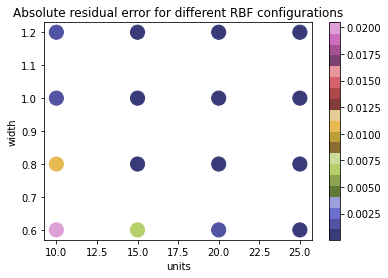

{(10, 0.6): 0.020481339355445573,
 (10, 0.8): 0.010874530756384188,
 (10, 1): 0.0018598784684060816,
 (10, 1.2): 0.00153785542437963,
 (15, 0.6): 0.006418137800254712,
 (15, 0.8): 0.0010389758845949046,
 (15, 1): 0.00023944372042287177,
 (15, 1.2): 0.000450319194374415,
 (20, 0.6): 0.0012175617749805446,
 (20, 0.8): 2.632483656038057e-05,
 (20, 1): 0.00023703769260665012,
 (20, 1.2): 0.00023766731387686826,
 (25, 0.6): 0.0007929724349940424,
 (25, 0.8): 0.00035011637159176005,
 (25, 1): 0.00010514592520586915,
 (25, 1.2): 0.00014360423413724724}

In [116]:
data = SinusData(noise=True)
plot_RBF_grid_search(data)

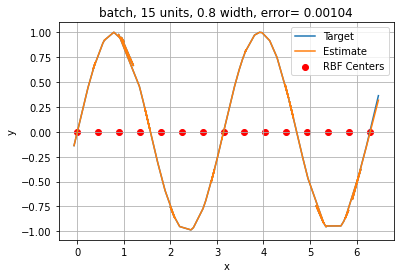

In [117]:
plot_estimate(data, n_nodes=15, sigma=0.8)

Text(0.5, 0, 'y')

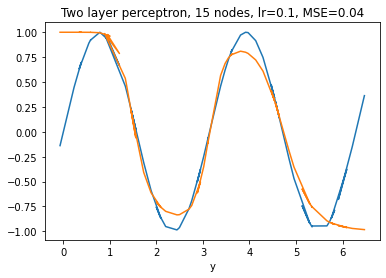

In [123]:
n = 15
lr = 0.1
tlp = TwoLP(nodes_num=n, output_dim=1, features_num=2, lr=lr)
tlp.train(data.x, data.y.T, X_test=data.x_test, y_test=data.y_test.T, epochs=400, verbose=True)
bias_x_test = np.c_[data.x_test, np.ones(data.x_test.shape[0])]
bias_x_test = bias_x_test.T
_, y_pred = tlp.forward_pass(bias_x_test)
 
plt.plot(data.x_test, data.y_test)
plt.plot(data.x_test, y_pred.flatten())
error = 0.5 * np.mean((y_pred - data.y_test.T)**2)
plt.title(f'Two layer perceptron, {n} nodes, lr={lr}, MSE={round(error, 2)}')
plt.xlabel('x')
plt.xlabel('y')

In [73]:
times = []
for i in range(20):
    rbf_net = RBF(CentersSampling.LINEAR, n_nodes=15, sigma=0.8)
    start = time.time()
    y_hat, error = rbf_net.batch_learning(data.x, data.y, data.x_test,data.y_test)
    end = time.time()
    times.append(end - start)
print(f'Time RBF mean: {np.mean(times)}, variance: {np.var(times)}')

Time RBF mean: 0.021156370639801025, variance: 1.721487619121831e-05


In [74]:
times = []
for i in range(20):
    tlp = TwoLP(nodes_num=15, output_dim=1, features_num=2, lr=0.1)
    start = time.time()
    tlp.train(data.x, data.y.T, X_test=data.x_test, y_test=data.y_test.T, epochs=400, verbose=True)
    end = time.time()
    times.append(end - start)
print(f'Time MLP mean: {np.mean(times)}, variance: {np.var(times)}')

Time MLP mean: 0.04067395925521851, variance: 2.4557736426658046e-05


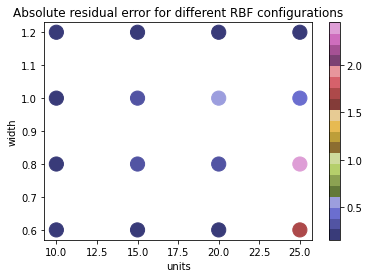

{(10, 0.6): 0.17475196565174014,
 (10, 0.8): 0.18172748254841112,
 (10, 1): 0.19415146923679372,
 (10, 1.2): 0.2051442362248488,
 (15, 0.6): 0.18478242671239767,
 (15, 0.8): 0.2706277174891381,
 (15, 1): 0.3535392732601539,
 (15, 1.2): 0.2028985180188015,
 (20, 0.6): 0.1761506617269549,
 (20, 0.8): 0.3288611356183651,
 (20, 1): 0.5471707541103895,
 (20, 1.2): 0.15578252331450693,
 (25, 0.6): 1.7098954778271112,
 (25, 0.8): 2.448540438675561,
 (25, 1): 0.4242017195925855,
 (25, 1.2): 0.2133845808731997}

In [75]:
data = SquareData(noise=True)
plot_RBF_grid_search(data)

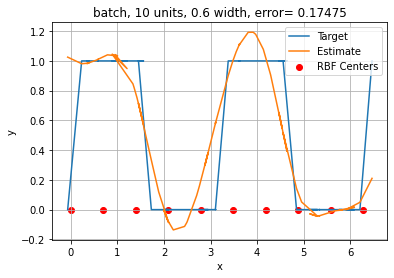

In [76]:
plot_estimate(data, n_nodes=10, sigma=0.6)

302.5157697200775


Text(0.5, 0, 'y')

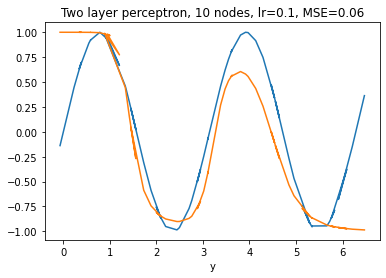

In [125]:
n=10
lr=0.1
tlp = TwoLP(nodes_num=n, output_dim=1, features_num=2, lr=lr)
tlp.train(data.x, data.y.T, X_test=data.x_test, y_test=data.y_test.T, epochs=400, verbose=True)
end = time.time()
print(end - start)

bias_x_test = np.c_[data.x_test, np.ones(data.x_test.shape[0])]
bias_x_test = bias_x_test.T
_, y_pred = tlp.forward_pass(bias_x_test)
 
plt.plot(data.x_test, data.y_test)
plt.plot(data.x_test, y_pred.flatten())
error = 0.5 * np.mean((y_pred - data.y_test.T)**2)
plt.title(f'Two layer perceptron, {n} nodes, lr={lr}, MSE={round(error, 2)}')
plt.xlabel('x')
plt.xlabel('y')

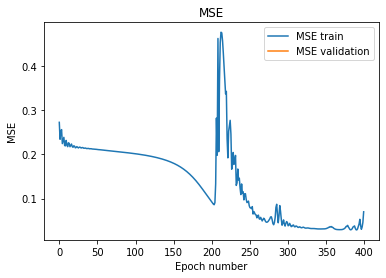

In [126]:
plt.plot(tlp.MSE, label='MSE train')
plt.plot(tlp.MSE_val, label='MSE validation')
plt.title('MSE')
plt.xlabel('Epoch number')
plt.ylabel('MSE')
plt.legend()

In [39]:
times = []
for i in range(20):
    rbf_net = RBF(CentersSampling.LINEAR, n_nodes=10, sigma=0.6)
    start = time.time()
    y_hat, error = rbf_net.batch_learning(data.x, data.y, data.x_test,data.y_test)
    end = time.time()
    times.append(end - start)
print(f'Time RBF mean: {np.mean(times)}, variance: {np.var(times)}')

Time RBF mean: 0.01655665636062622, variance: 3.58450351015449e-06


In [120]:
times = []
for i in range(20):
    tlp = TwoLP(nodes_num=10, output_dim=1, features_num=2, lr=0.1)
    start = time.time()
    tlp.train(data.x, data.y.T, X_test=data.x_test, y_test=data.y_test.T, epochs=400, verbose=True)
    end = time.time()
    times.append(end - start)
print(f'Time MLP mean: {np.mean(times)}, variance: {np.var(times)}')

Time MLP mean: 0.03902802467346191, variance: 5.196781287054365e-05


## Batch vs delta
for the same network models estimate their test performance on the
original clean data used in section 3.1 (a corresponding test subset but
without noise) and compare your findings.

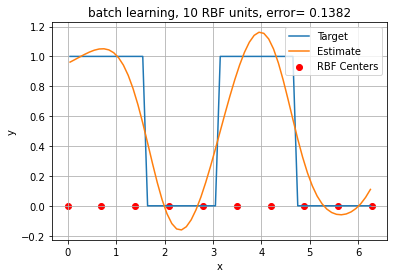

100%|██████████| 20/20 [00:09<00:00,  2.12it/s]


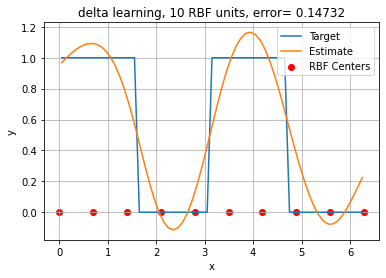

In [15]:
data = SquareData(noise=False)

plot_estimate(data, n_nodes=10)
plot_estimate(data, learning_type='delta', delta_max_iters=20, n_nodes=10, delta_lr=0.1)

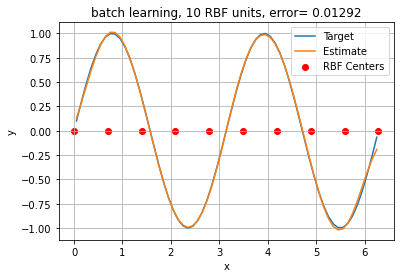

100%|██████████| 40/40 [00:18<00:00,  2.12it/s]


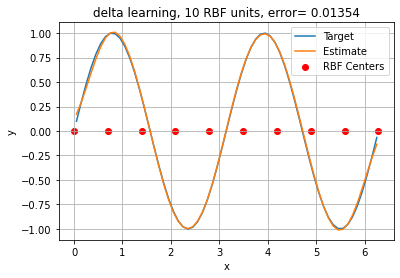

In [19]:
data = SinusData(noise=False)
plot_estimate(data, n_nodes=10)
plot_estimate(data, learning_type='delta', delta_max_iters=40, n_nodes=10, delta_lr=0.08)